In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly
import plotly.express as px

In [2]:
df=pd.read_csv('covid_19_clean_complete.csv')

In [3]:
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [4]:
# renaming the columns
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [5]:
df.rename(columns={'Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long','Date':'date','Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'}, inplace=True)

In [6]:
df

state                country        lat       long        date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [7]:
df['active']=df['confirmed']-df['deaths']-df['recovered']

In [8]:
# Visually analysing the trends

In [9]:
df['date'].max()    # most recent date

'2020-07-27'

In [10]:
recent_day=df[df['date']=='2020-07-27']

In [11]:
recent_day

state                country        lat       long        date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active             WHO Region  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

In [12]:
world=recent_day.groupby('country')[['confirmed','active','deaths','recovered']].sum().reset_index()
world

country  confirmed  active  deaths  recovered
0           Afghanistan      36263    9796    1269      25198
1               Albania       4880    1991     144       2745
2               Algeria      27973    7973    1163      18837
3               Andorra        907      52      52        803
4                Angola        950     667      41        242
..                  ...        ...     ...     ...        ...
182  West Bank and Gaza      10621    6791      78       3752
183      Western Sahara         10       1       1          8
184               Yemen       1691     375     483        833
185              Zambia       4552    1597     140       2815
186            Zimbabwe       2704    2126      36        542

[187 rows x 5 columns]

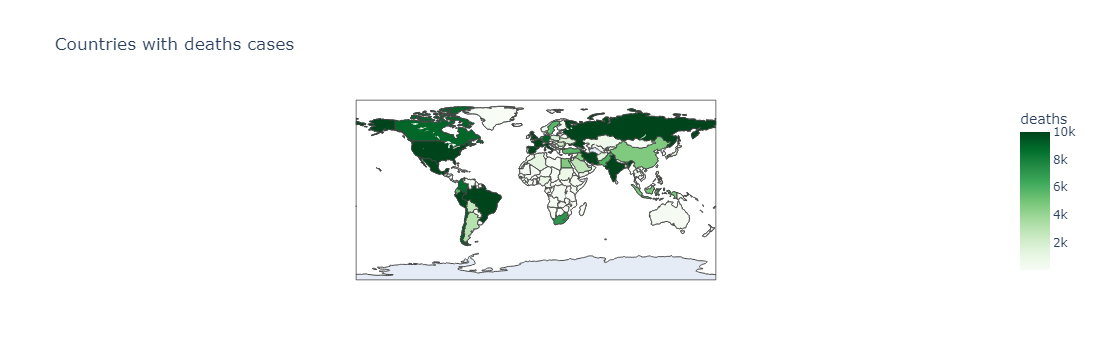

In [13]:
figure=px.choropleth(world,locations='country',locationmode='country names',
                     color='deaths',hover_name='country',range_color=[1,10000],
                     color_continuous_scale='greens',title='Countries with deaths cases')
figure.show()

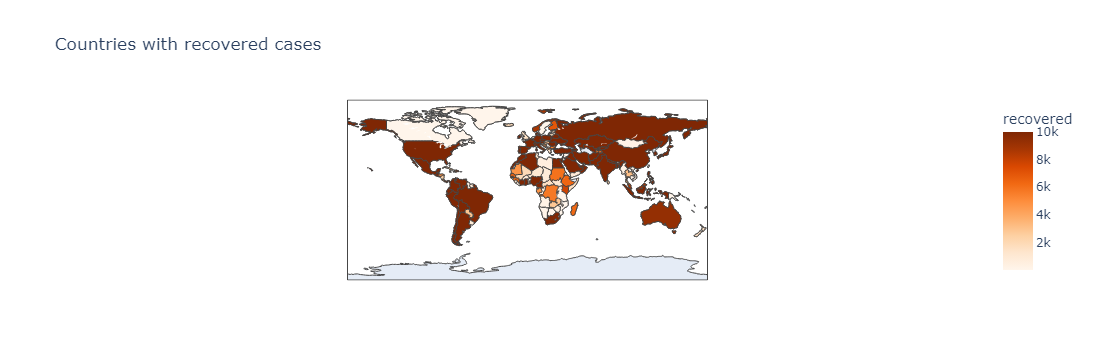

In [14]:
figure=px.choropleth(world,locations='country',locationmode='country names',
                     color='recovered',hover_name='country',range_color=[1,10000],
                     color_continuous_scale='oranges',title='Countries with recovered cases')
figure.show()

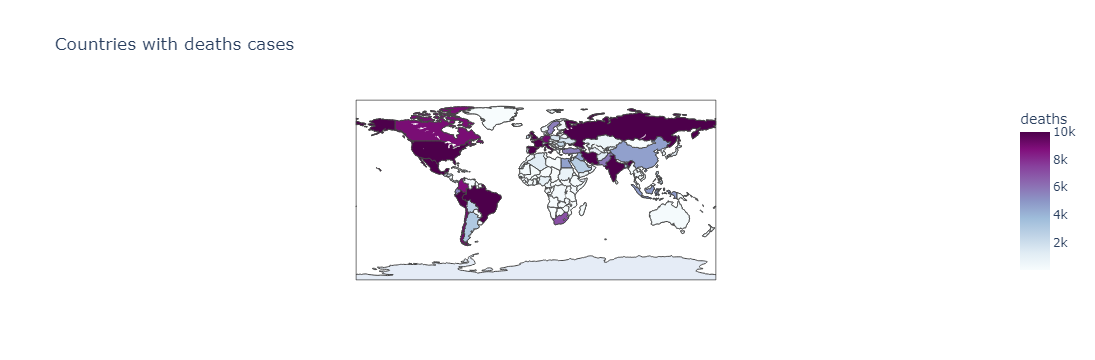

In [15]:
figure=px.choropleth(world,locations='country',locationmode='country names',
                     color='deaths',hover_name='country',range_color=[1,10000],
                     color_continuous_scale='bupu',title='Countries with deaths cases')
figure.show()

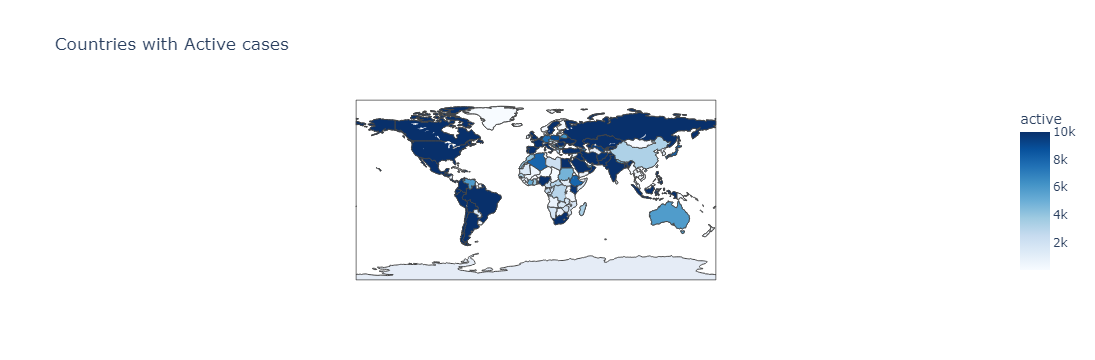

In [16]:
figure=px.choropleth(world,locations='country',locationmode='country names',
                     color='active',hover_name='country',range_color=[1,10000],
                     color_continuous_scale='blues',title='Countries with Active cases')
figure.show()

In [17]:
# trend of how covid spread

In [18]:
df.groupby('date')['confirmed'].sum().reset_index()

date  confirmed
0    2020-01-22        555
1    2020-01-23        654
2    2020-01-24        941
3    2020-01-25       1434
4    2020-01-26       2118
..          ...        ...
183  2020-07-23   15510481
184  2020-07-24   15791645
185  2020-07-25   16047190
186  2020-07-26   16251796
187  2020-07-27   16480485

[188 rows x 2 columns]

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

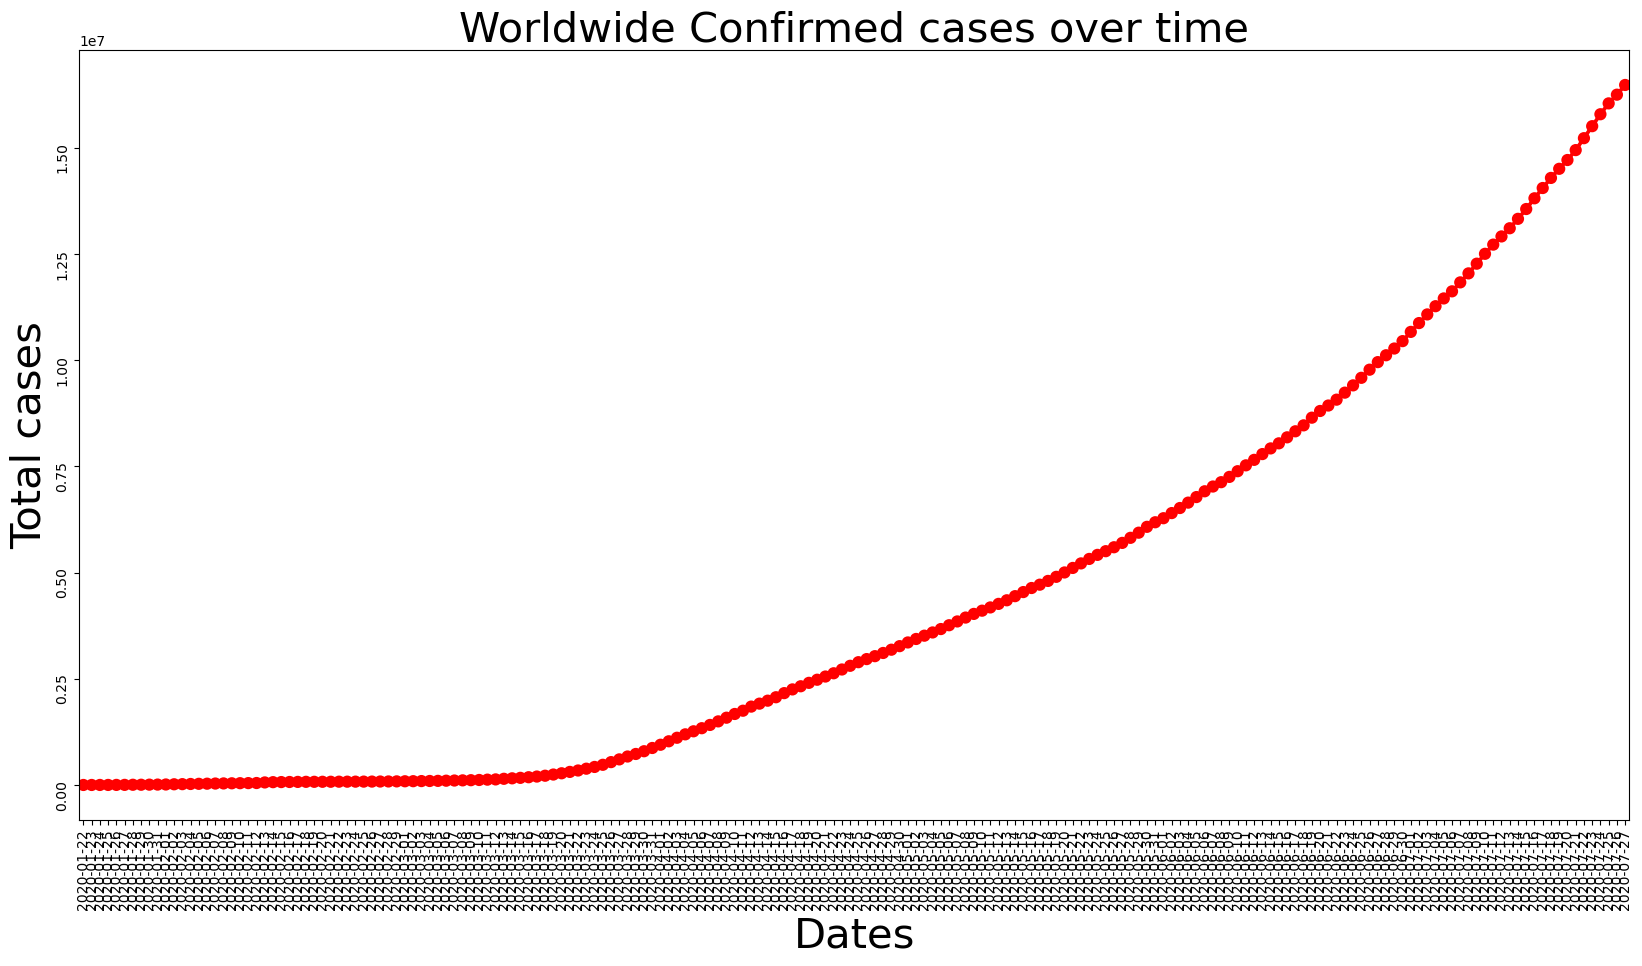

In [19]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=90, fontsize=10)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total cases',fontsize=30)
plt.title('Worldwide Confirmed cases over time', fontsize=30)
total_cases=df.groupby('date')['confirmed'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])

ax=sns.pointplot(x=total_cases.date.dt.date, y=total_cases.confirmed, color='r')
ax.set(xlabel='Dates', ylabel='Total cases')

In [20]:
# At the mid of March 2020 , Confirmed covid cases are constant, but after it increases drastically

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

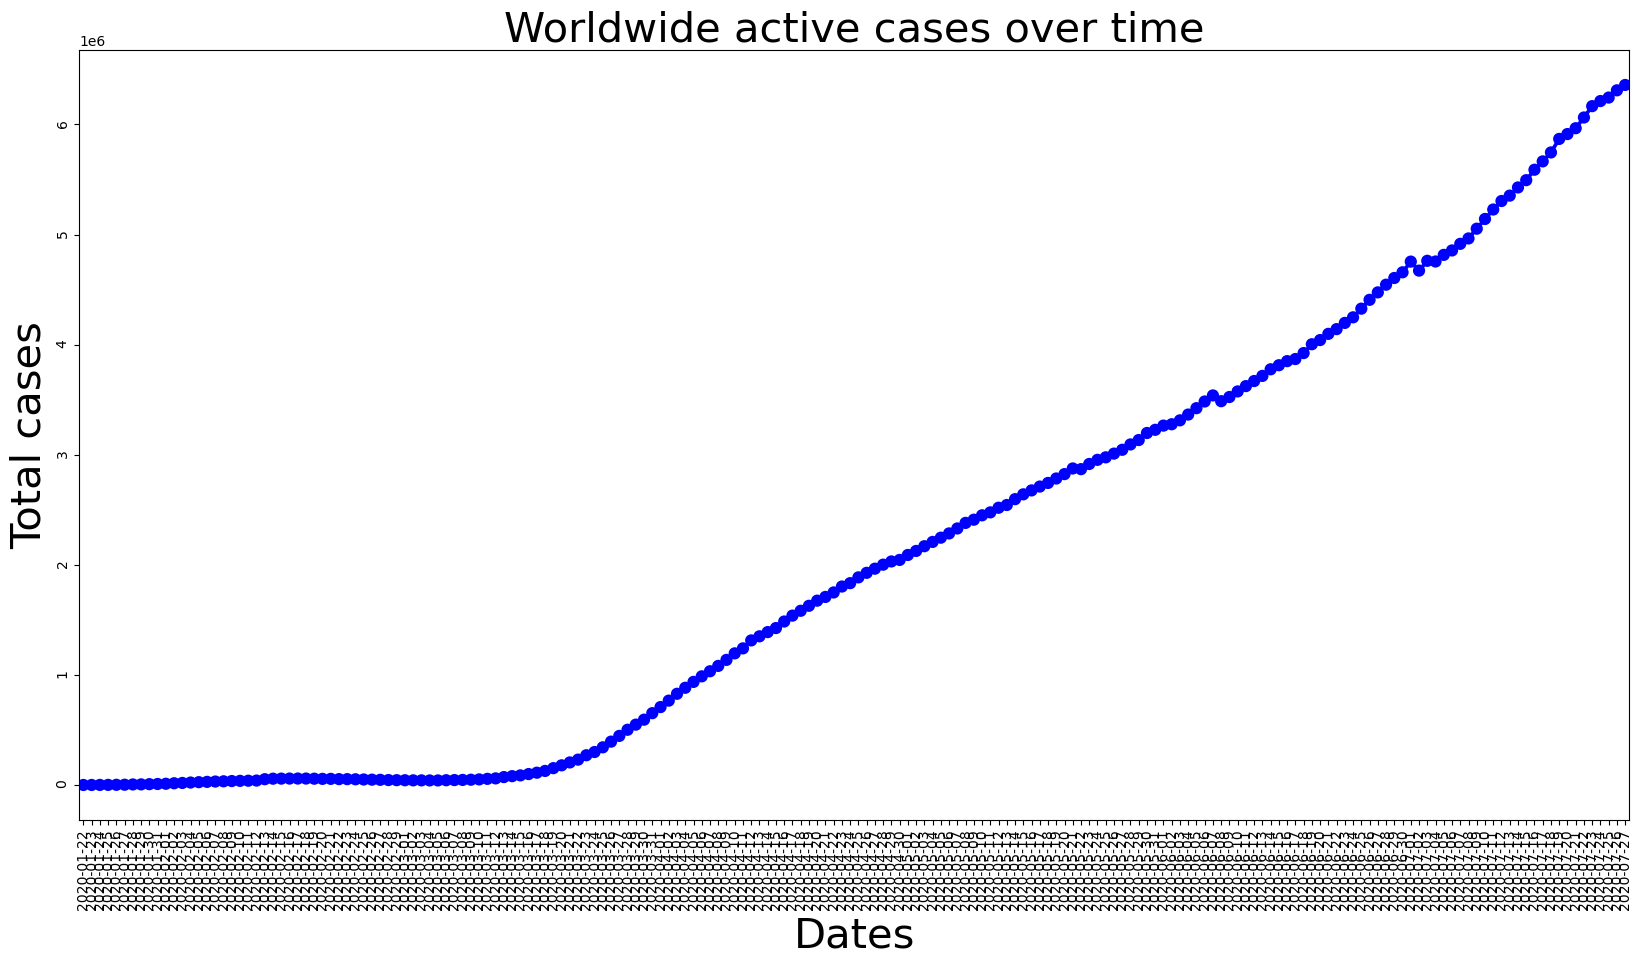

In [21]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=90, fontsize=10)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total cases',fontsize=30)
plt.title('Worldwide active cases over time', fontsize=30)
total_cases=df.groupby('date')['active'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])

ax=sns.pointplot(x=total_cases.date.dt.date, y=total_cases.active, color='b')
ax.set(xlabel='Dates', ylabel='Total cases')

In [22]:
#  Active covid cases are almost constant at beginning, but suddenly started increasing , having some fluctuations

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

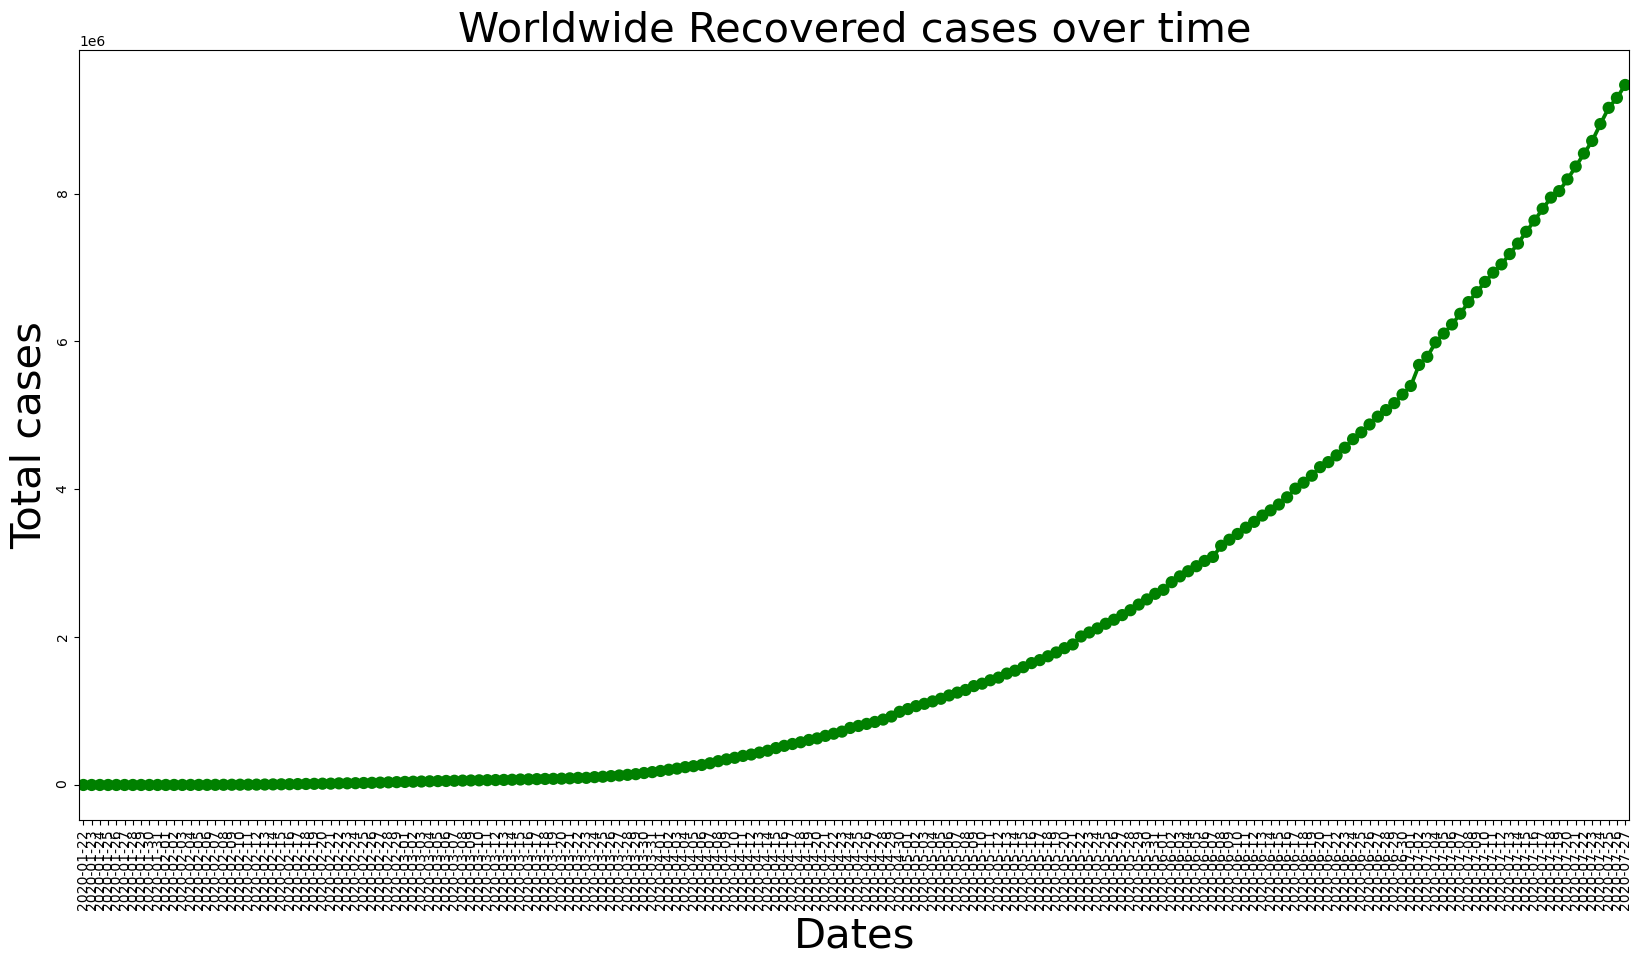

In [23]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=90, fontsize=10)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total cases',fontsize=30)
plt.title('Worldwide Recovered cases over time', fontsize=30)
total_cases=df.groupby('date')['recovered'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])

ax=sns.pointplot(x=total_cases.date.dt.date, y=total_cases.recovered, color='g')
ax.set(xlabel='Dates', ylabel='Total cases')

In [24]:
#  In recovered covid cases are almost constant at beginning, but suddenly started increasing ,having some fluctuations

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

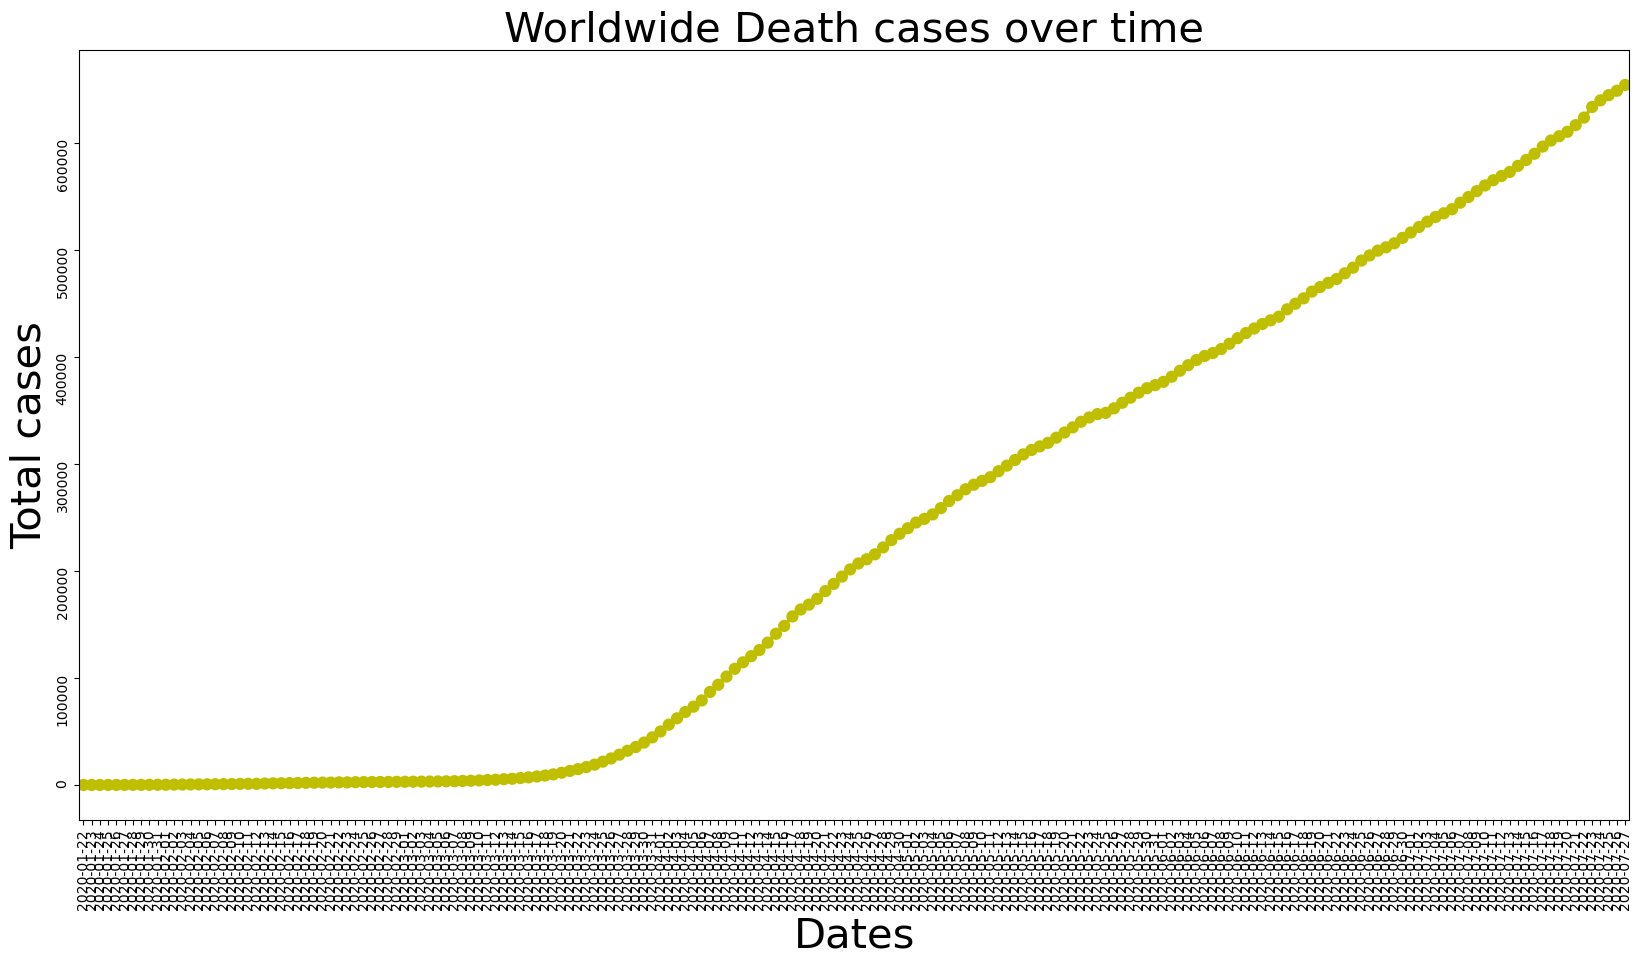

In [25]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=90, fontsize=10)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total cases',fontsize=30)
plt.title('Worldwide Death cases over time', fontsize=30)
total_cases=df.groupby('date')['deaths'].sum().reset_index()
total_cases['date']=pd.to_datetime(total_cases['date'])

ax=sns.pointplot(x=total_cases.date.dt.date, y=total_cases.deaths, color='y')
ax.set(xlabel='Dates', ylabel='Total cases')

In [26]:
# Top 10 countries with highest active cases in the most recent date.

In [27]:
top_actives=recent_day.groupby(by='country')['active'].sum().sort_values(ascending=False).head(10).reset_index()
top_actives

country   active
0              US  2816444
1          Brazil   508116
2           India   495499
3  United Kingdom   254427
4          Russia   201097
5    South Africa   170537
6        Colombia   117163
7          France   108928
8          Canada   107514
9            Peru    98752

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

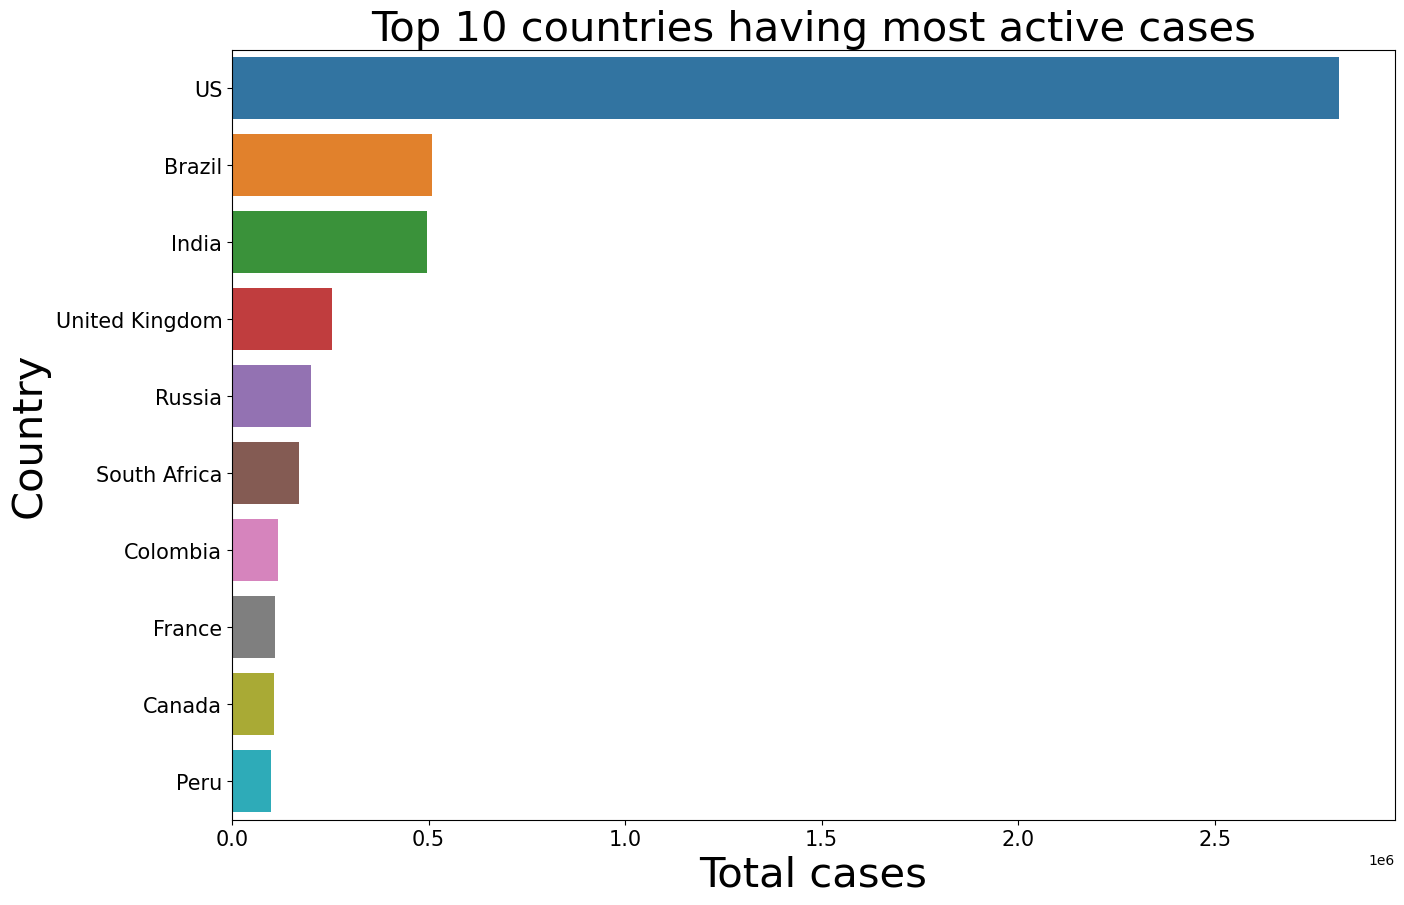

In [28]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases',fontsize=30)
plt.ylabel('country',fontsize=30)
plt.title('Top 10 countries having most active cases', fontsize=30)

ax=sns.barplot(x=top_actives.active, y=top_actives.country)
ax.set(xlabel='Total cases', ylabel='Country')


In [29]:
# Top 10 countries with highest confirmed cases in the most recent date.

In [30]:
top_confirmed=recent_day.groupby(by='country')['confirmed'].sum().sort_values(ascending=False).head(10).reset_index()
top_confirmed

country  confirmed
0              US    4290259
1          Brazil    2442375
2           India    1480073
3          Russia     816680
4    South Africa     452529
5          Mexico     395489
6            Peru     389717
7           Chile     347923
8  United Kingdom     301708
9            Iran     293606

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

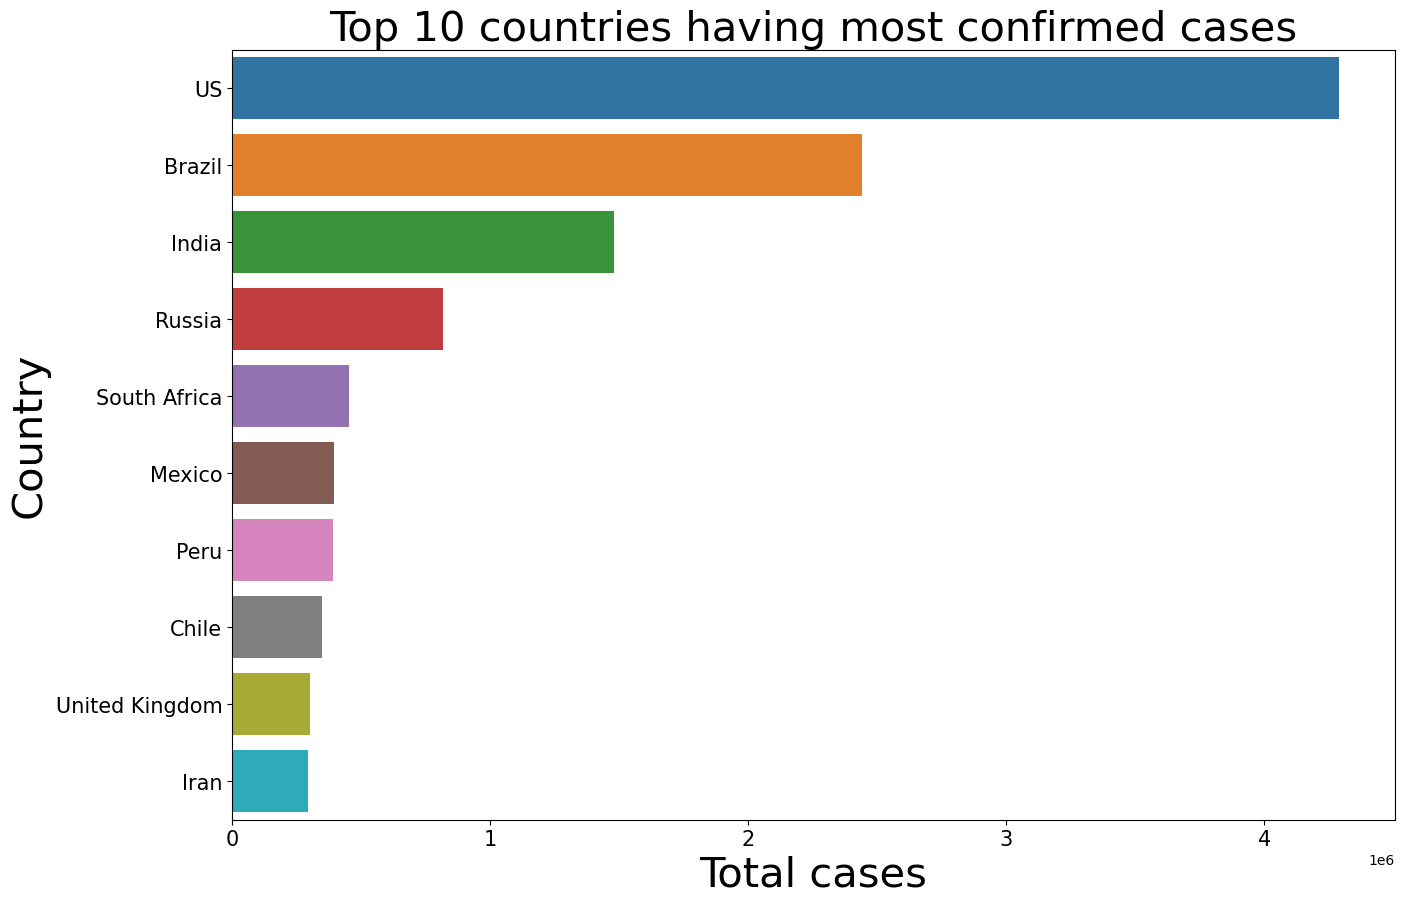

In [31]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases',fontsize=30)
plt.ylabel('country',fontsize=30)
plt.title('Top 10 countries having most confirmed cases', fontsize=30)

ax=sns.barplot(x=top_confirmed.confirmed, y=top_confirmed.country)
ax.set(xlabel='Total cases', ylabel='Country')


In [32]:
# Top 10 countries with highest death cases in the most recent date.

In [33]:
top_deaths=recent_day.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(10).reset_index()
top_deaths

country  deaths
0              US  148011
1          Brazil   87618
2  United Kingdom   45844
3          Mexico   44022
4           Italy   35112
5           India   33408
6          France   30212
7           Spain   28432
8            Peru   18418
9            Iran   15912

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

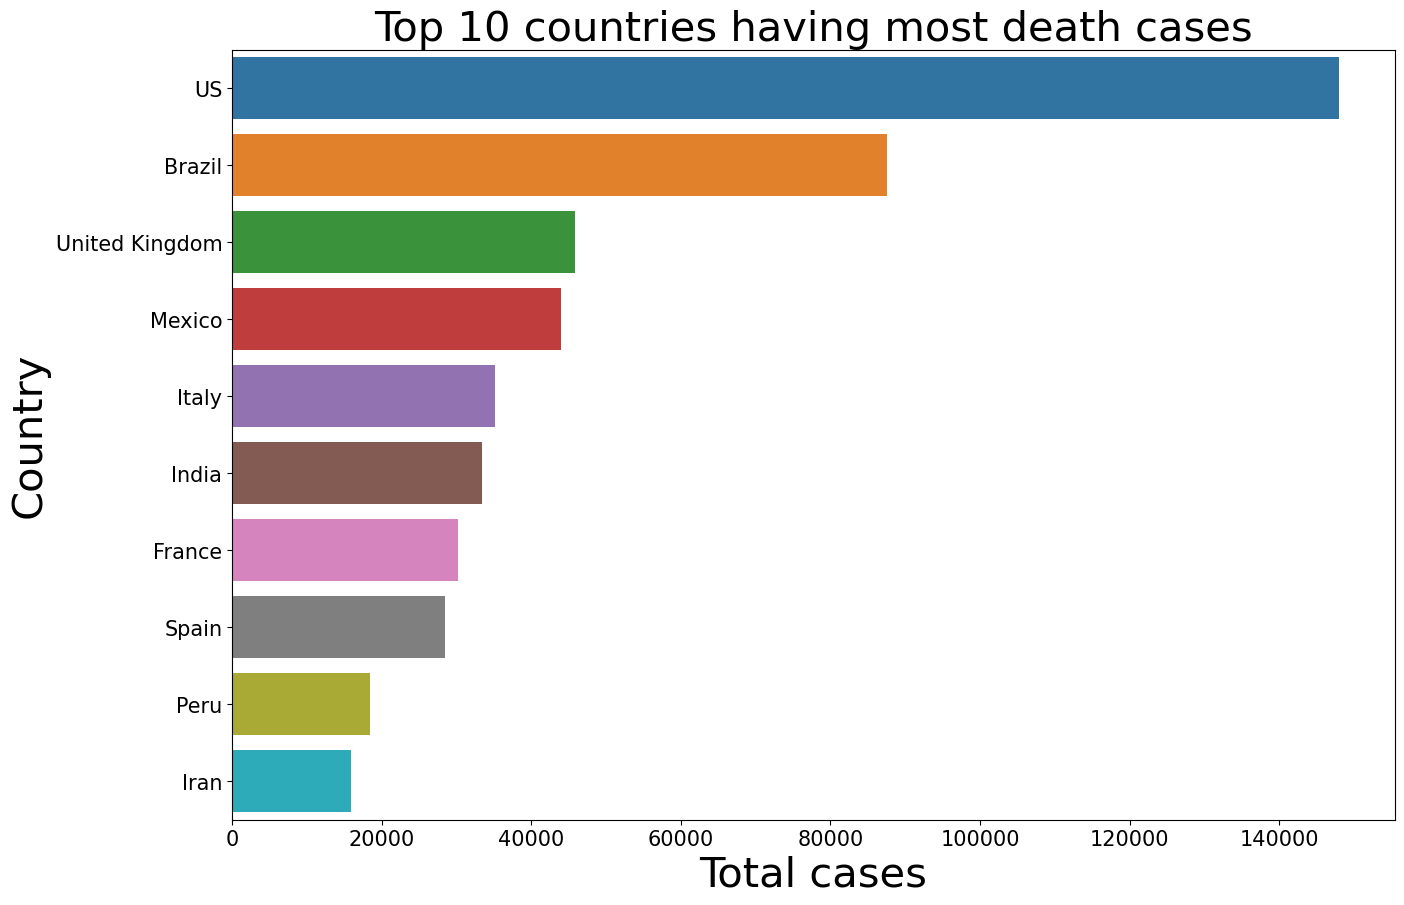

In [34]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases',fontsize=30)
plt.ylabel('country',fontsize=30)
plt.title('Top 10 countries having most death cases', fontsize=30)

ax=sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
ax.set(xlabel='Total cases', ylabel='Country')


In [35]:
# Top 10 countries with highest recovered cases in the most recent date.

In [36]:
top_recovered=recent_day.groupby(by='country')['recovered'].sum().sort_values(ascending=False).head(10).reset_index()
top_recovered

country  recovered
0        Brazil    1846641
1            US    1325804
2         India     951166
3        Russia     602249
4         Chile     319954
5        Mexico     303810
6  South Africa     274925
7          Peru     272547
8          Iran     255144
9      Pakistan     241026

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

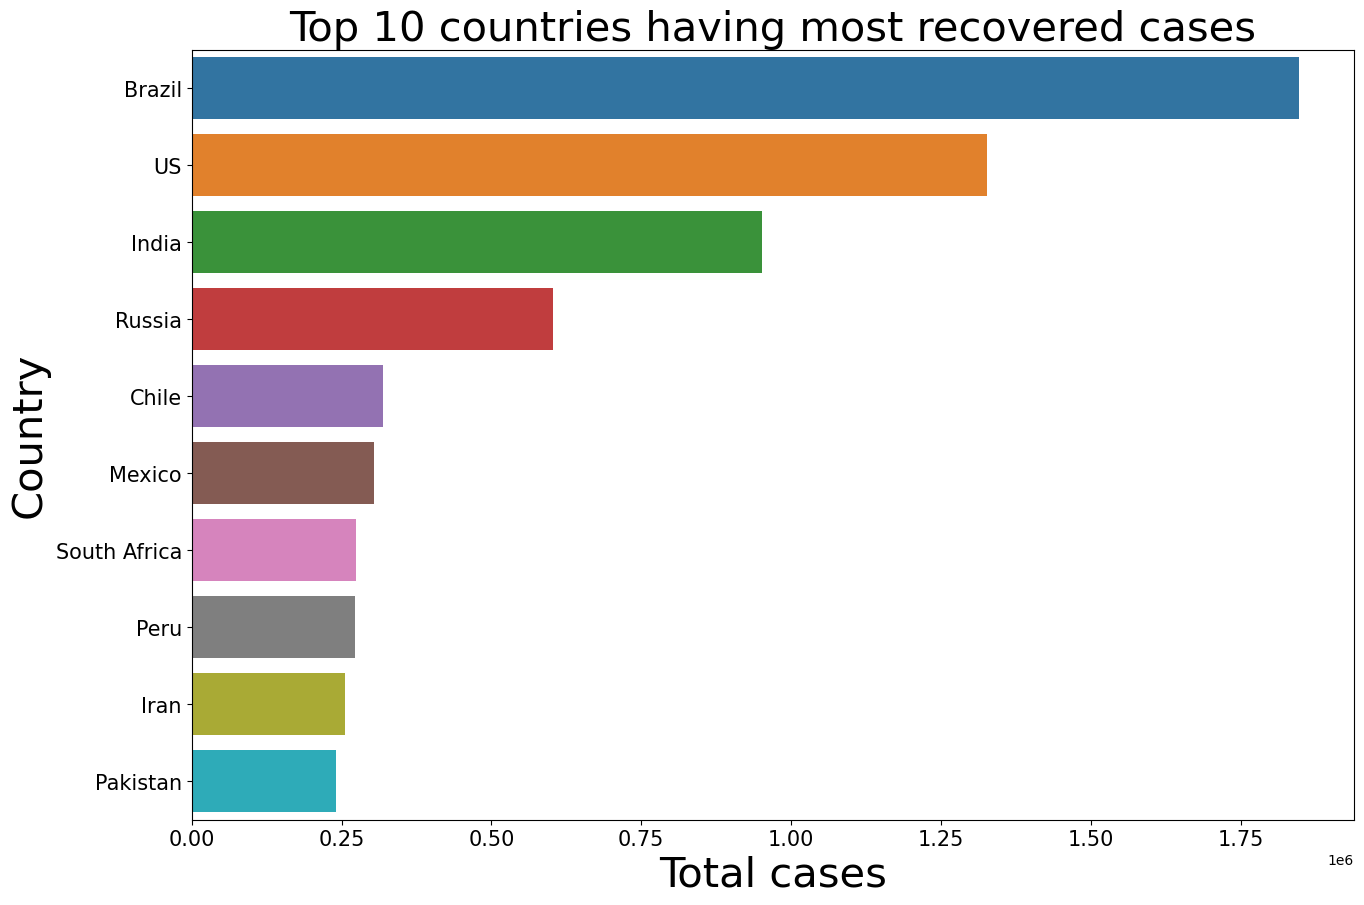

In [37]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases',fontsize=30)
plt.ylabel('country',fontsize=30)
plt.title('Top 10 countries having most recovered cases', fontsize=30)

ax=sns.barplot(x=top_recovered.recovered, y=top_recovered.country)
ax.set(xlabel='Total cases', ylabel='Country')


In [38]:
brazil=df[df.country=='Brazil']
brazil

state country     lat     long        date  confirmed  deaths  \
28      NaN  Brazil -14.235 -51.9253  2020-01-22          0       0   
289     NaN  Brazil -14.235 -51.9253  2020-01-23          0       0   
550     NaN  Brazil -14.235 -51.9253  2020-01-24          0       0   
811     NaN  Brazil -14.235 -51.9253  2020-01-25          0       0   
1072    NaN  Brazil -14.235 -51.9253  2020-01-26          0       0   
...     ...     ...     ...      ...         ...        ...     ...   
47791   NaN  Brazil -14.235 -51.9253  2020-07-23    2287475   84082   
48052   NaN  Brazil -14.235 -51.9253  2020-07-24    2343366   85238   
48313   NaN  Brazil -14.235 -51.9253  2020-07-25    2394513   86449   
48574   NaN  Brazil -14.235 -51.9253  2020-07-26    2419091   87004   
48835   NaN  Brazil -14.235 -51.9253  2020-07-27    2442375   87618   

       recovered  active WHO Region  
28             0       0   Americas  
289            0       0   Americas  
550            0       0   Americas  
811            0       0   Americas  
1072           0       0   Americas  
...          ...     ...        ...  
47791    1620313  583080   Americas  
48052    1693214  564914   Americas  
48313    1785359  522705   Americas  
48574    1812913  519174   Americas  
48835    1846641  508116   Americas  

[188 rows x 10 columns]

In [39]:
brazil=df[df.country=='Brazil']
brazil=brazil.groupby(by='date')[['confirmed','deaths','recovered','active']].sum().reset_index()
brazil

date  confirmed  deaths  recovered  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23    2287475   84082    1620313  583080
184  2020-07-24    2343366   85238    1693214  564914
185  2020-07-25    2394513   86449    1785359  522705
186  2020-07-26    2419091   87004    1812913  519174
187  2020-07-27    2442375   87618    1846641  508116

[188 rows x 5 columns]

In [40]:
UK=df[df.country=='United Kingdom']
UK=UK.groupby(by='date')[['confirmed','deaths','recovered','active']].sum().reset_index()
UK

date  confirmed  deaths  recovered  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     298731   45639       1425  251667
184  2020-07-24     299500   45762       1425  252313
185  2020-07-25     300270   45823       1427  253020
186  2020-07-26     301020   45837       1434  253749
187  2020-07-27     301708   45844       1437  254427

[188 rows x 5 columns]

In [41]:
India=df[df.country=='India']
India=India.groupby(by='date')[['confirmed','deaths','recovered','active']].sum().reset_index()
India

date  confirmed  deaths  recovered  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23    1288108   30601     817209  440298
184  2020-07-24    1337024   31358     849432  456234
185  2020-07-25    1385635   32060     885573  468002
186  2020-07-26    1435616   32771     917568  485277
187  2020-07-27    1480073   33408     951166  495499

[188 rows x 5 columns]

In [42]:
US=df[df.country=='US']
US=US.groupby(by='date')[['confirmed','deaths','recovered','active']].sum().reset_index()
US

date  confirmed  deaths  recovered   active
0    2020-01-22          1       0          0        1
1    2020-01-23          1       0          0        1
2    2020-01-24          2       0          0        2
3    2020-01-25          2       0          0        2
4    2020-01-26          5       0          0        5
..          ...        ...     ...        ...      ...
183  2020-07-23    4038816  144430    1233269  2661117
184  2020-07-24    4112531  145560    1261624  2705347
185  2020-07-25    4178970  146465    1279414  2753091
186  2020-07-26    4233923  146935    1297863  2789125
187  2020-07-27    4290259  148011    1325804  2816444

[188 rows x 5 columns]

In [43]:
russia=df[df.country=='Russia']
russia=russia.groupby(by='date')[['confirmed','deaths','recovered','active']].sum().reset_index()
russia

date  confirmed  deaths  recovered  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     793720   12873     579295  201552
184  2020-07-24     799499   13026     587728  198745
185  2020-07-25     805332   13172     596064  196096
186  2020-07-26     811073   13249     599172  198652
187  2020-07-27     816680   13334     602249  201097

[188 rows x 5 columns]

In [44]:
# lets compare the trends of confirmed cases

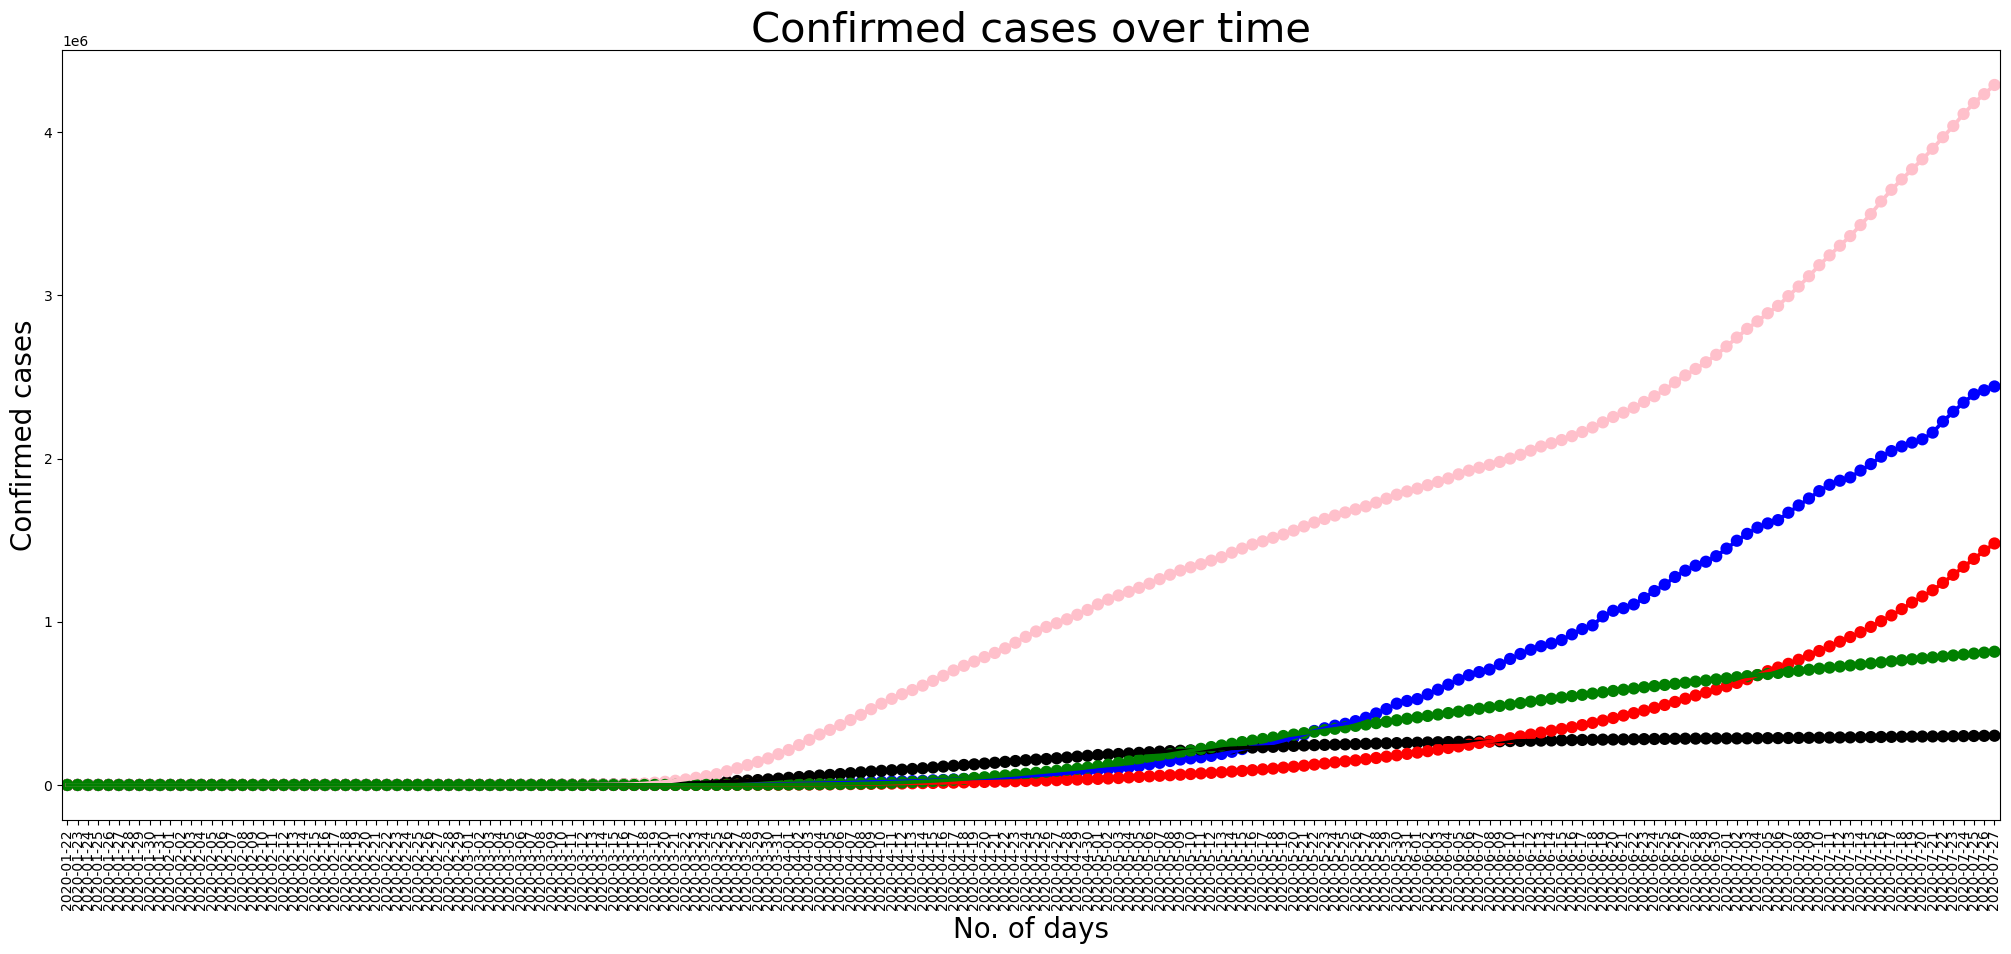

In [45]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.pointplot(x=brazil.date, y=brazil.confirmed, color="Blue")
sns.pointplot(x=UK.date, y=UK.confirmed, color="Black")
sns.pointplot(x=India.date, y=India.confirmed, color="Red")
sns.pointplot(x=US.date, y=US.confirmed, color="Pink")
sns.pointplot(x=russia.date, y=russia.confirmed, color="Green")
plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Confirmed cases', fontsize=20)
plt.title('Confirmed cases over time', fontsize=30)
plt.show()


In [46]:
# lets compare the trends of active cases

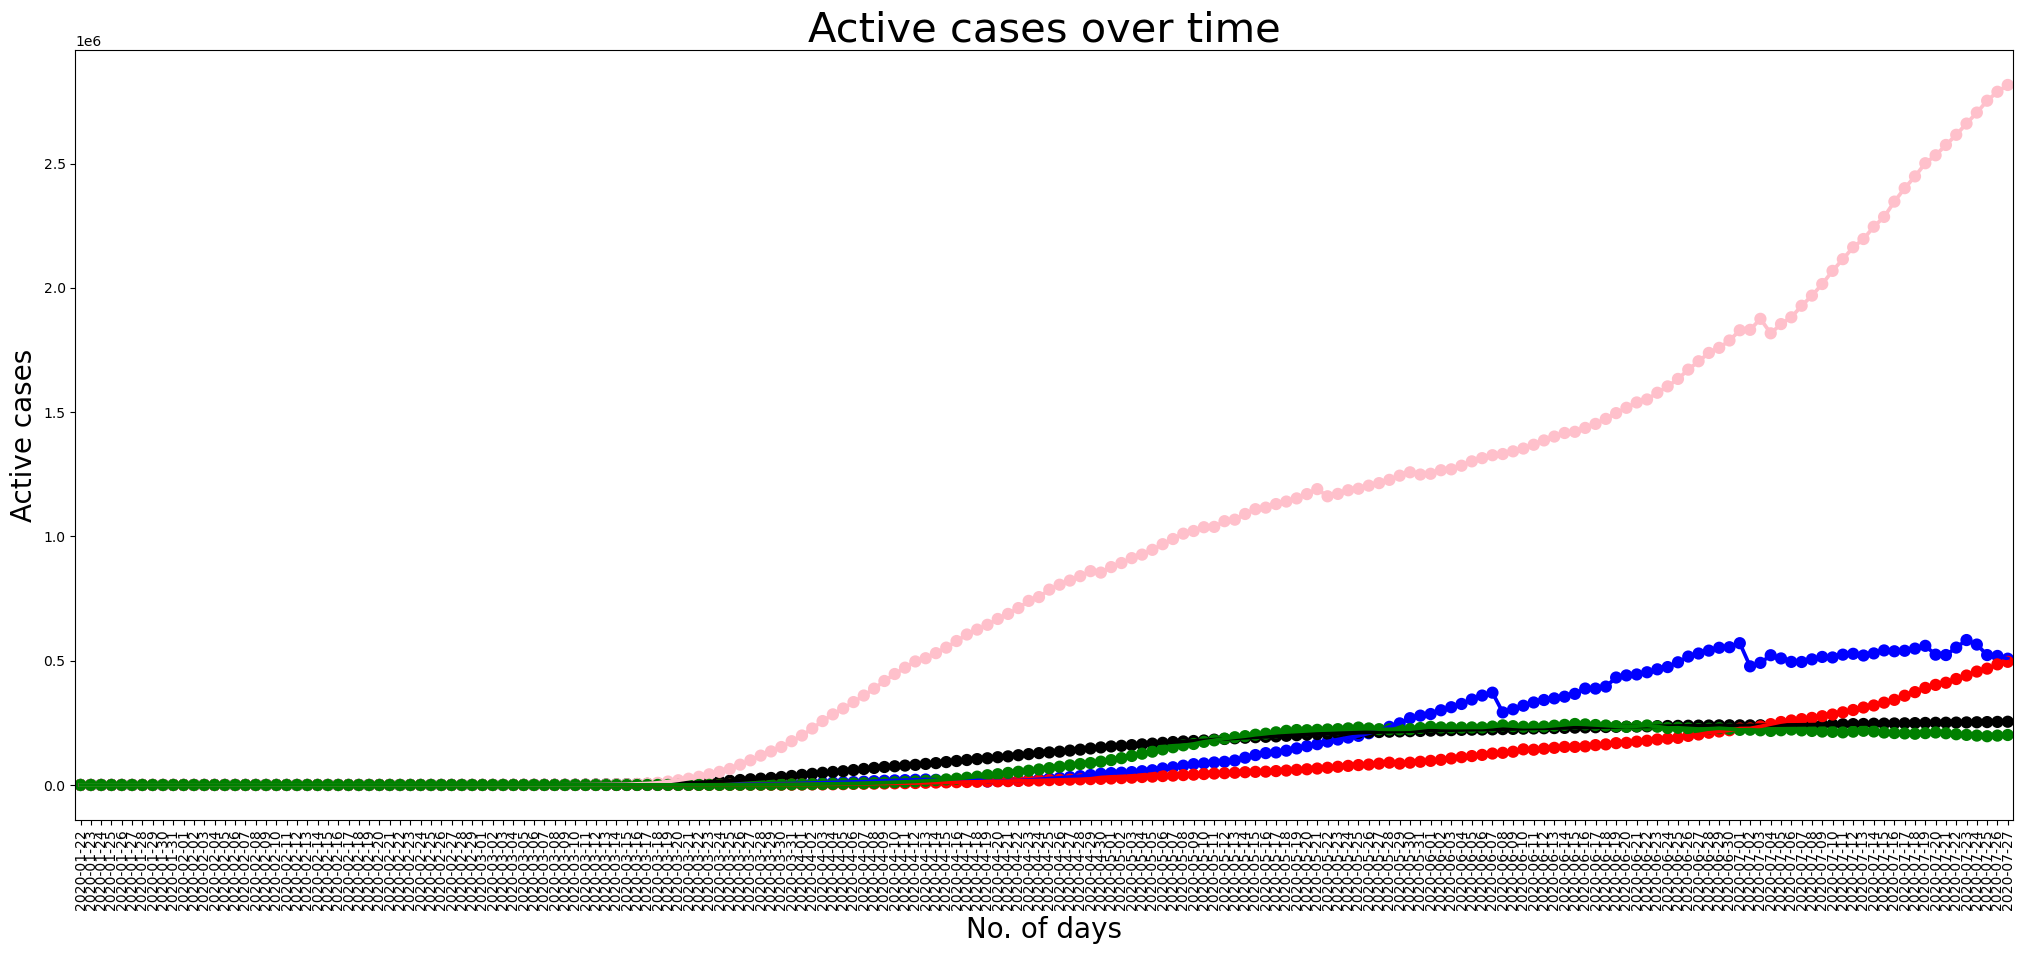

In [47]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.pointplot(x=brazil.date, y=brazil.active, color="Blue")
sns.pointplot(x=UK.date, y=UK.active, color="Black")
sns.pointplot(x=India.date, y=India.active, color="Red")
sns.pointplot(x=US.date, y=US.active, color="Pink")
sns.pointplot(x=russia.date, y=russia.active, color="Green")
plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Active cases', fontsize=20)
plt.title('Active cases over time', fontsize=30)
plt.show()


#  Forecasting

In [48]:
!pip install prophet

In [49]:
from prophet import Prophet

In [50]:
df

state                country        lat       long        date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [51]:
Confirmed = df.groupby('date').sum()['confirmed'].reset_index()
Confirmed

date  confirmed
0    2020-01-22        555
1    2020-01-23        654
2    2020-01-24        941
3    2020-01-25       1434
4    2020-01-26       2118
..          ...        ...
183  2020-07-23   15510481
184  2020-07-24   15791645
185  2020-07-25   16047190
186  2020-07-26   16251796
187  2020-07-27   16480485

[188 rows x 2 columns]

In [52]:
Deaths = df.groupby('date').sum()['deaths'].reset_index()
Deaths

date  deaths
0    2020-01-22      17
1    2020-01-23      18
2    2020-01-24      26
3    2020-01-25      42
4    2020-01-26      56
..          ...     ...
183  2020-07-23  633506
184  2020-07-24  639650
185  2020-07-25  644517
186  2020-07-26  648621
187  2020-07-27  654036

[188 rows x 2 columns]

In [53]:
Recovered = df.groupby('date').sum()['recovered'].reset_index()
Recovered

date  recovered
0    2020-01-22         28
1    2020-01-23         30
2    2020-01-24         36
3    2020-01-25         39
4    2020-01-26         52
..          ...        ...
183  2020-07-23    8710969
184  2020-07-24    8939705
185  2020-07-25    9158743
186  2020-07-26    9293464
187  2020-07-27    9468087

[188 rows x 2 columns]

In [54]:
Active = df.groupby('date').sum()['active'].reset_index()
Active

date   active
0    2020-01-22      510
1    2020-01-23      606
2    2020-01-24      879
3    2020-01-25     1353
4    2020-01-26     2010
..          ...      ...
183  2020-07-23  6166006
184  2020-07-24  6212290
185  2020-07-25  6243930
186  2020-07-26  6309711
187  2020-07-27  6358362

[188 rows x 2 columns]

In [55]:
# Lets do forecasting for confirmed cases

In [56]:
# renaming the columns-- 'ds' and 'y'

In [57]:
Confirmed.rename(columns={'date':'ds', 'confirmed':'y'}, inplace=True)
Confirmed

ds         y
0    2020-01-22       555
1    2020-01-23       654
2    2020-01-24       941
3    2020-01-25      1434
4    2020-01-26      2118
..          ...       ...
183  2020-07-23  15510481
184  2020-07-24  15791645
185  2020-07-25  16047190
186  2020-07-26  16251796
187  2020-07-27  16480485

[188 rows x 2 columns]

In [58]:
# model building

model=Prophet(interval_width=0.95)

In [59]:
model.fit(Confirmed)

12:10:57 - cmdstanpy - INFO - Chain [1] start processing
12:10:58 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
# making future dataframe

future=model.make_future_dataframe(periods=7)

In [61]:
future.tail(10)

ds
185 2020-07-25
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [62]:
forecast=model.predict(future)

In [63]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  1.632122e+07  1.616394e+07  1.648538e+07
189 2020-07-29  1.653111e+07  1.637845e+07  1.670122e+07
190 2020-07-30  1.674505e+07  1.658737e+07  1.689355e+07
191 2020-07-31  1.696030e+07  1.680049e+07  1.714119e+07
192 2020-08-01  1.716802e+07  1.699597e+07  1.734002e+07
193 2020-08-02  1.736561e+07  1.719654e+07  1.755166e+07
194 2020-08-03  1.756027e+07  1.737991e+07  1.772685e+07

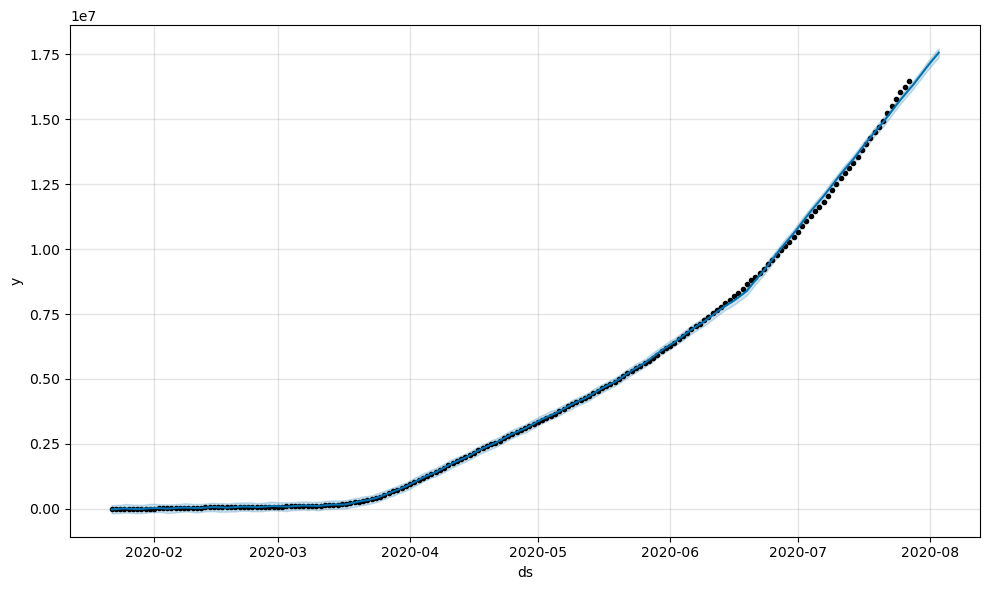

In [64]:
confirmed_forecast_plot=model.plot(forecast)

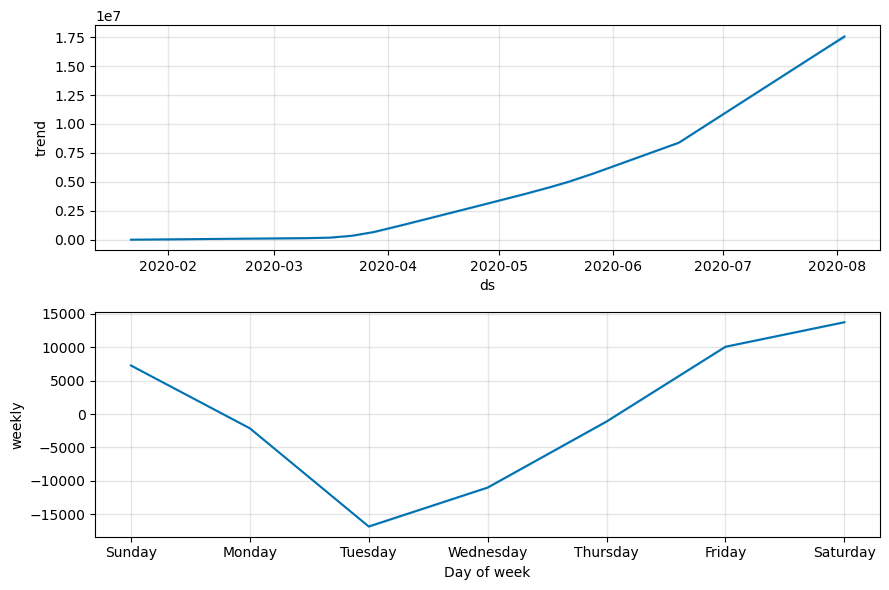

In [65]:
confirmed_forecast_plot_=model.plot_components(forecast)

In [66]:
# Lets do forecasting for death cases

In [67]:
Deaths.rename(columns={'date':'ds', 'deaths':'y'}, inplace=True)
Deaths

ds       y
0    2020-01-22      17
1    2020-01-23      18
2    2020-01-24      26
3    2020-01-25      42
4    2020-01-26      56
..          ...     ...
183  2020-07-23  633506
184  2020-07-24  639650
185  2020-07-25  644517
186  2020-07-26  648621
187  2020-07-27  654036

[188 rows x 2 columns]

In [68]:
model2=Prophet(interval_width=0.95)

In [69]:
model2.fit(Deaths)

12:11:03 - cmdstanpy - INFO - Chain [1] start processing
12:11:03 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
future2=model2.make_future_dataframe(periods=7)

In [71]:
forecast2=model2.predict(future2)

In [72]:
forecast2[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

ds           yhat     yhat_lower     yhat_upper
188 2020-07-28  652337.420929  649222.388488  655468.859317
189 2020-07-29  657905.672487  654930.107536  661078.417218
190 2020-07-30  663516.216151  660244.301215  666589.018288
191 2020-07-31  669032.693224  665618.905679  672555.583451
192 2020-08-01  673915.507105  669950.346924  677762.818720
193 2020-08-02  678055.205332  673396.149496  682894.559391
194 2020-08-03  682345.782674  676452.769067  688403.041104

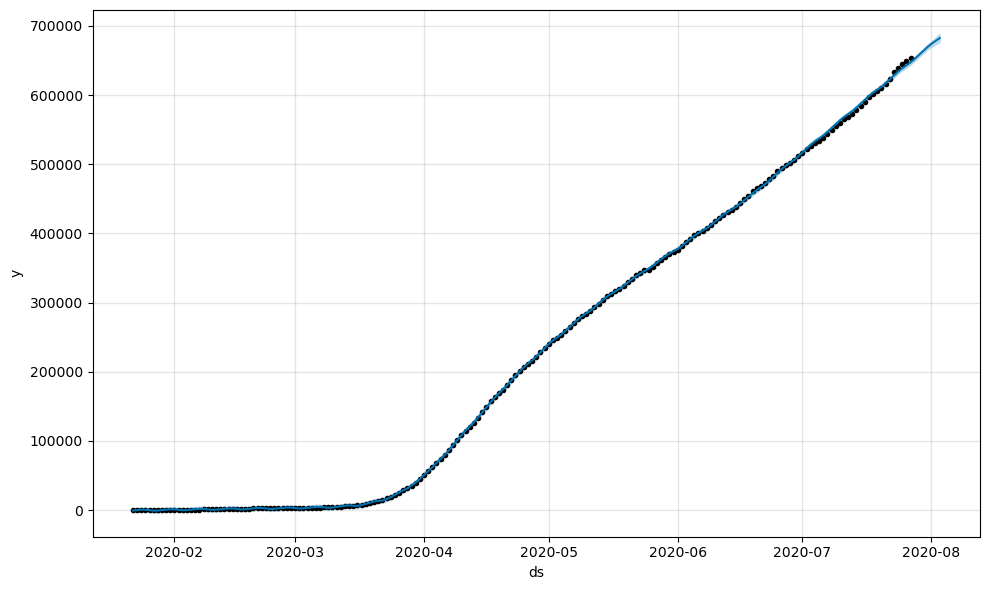

In [73]:
deaths_forecast_plot2=model2.plot(forecast2)

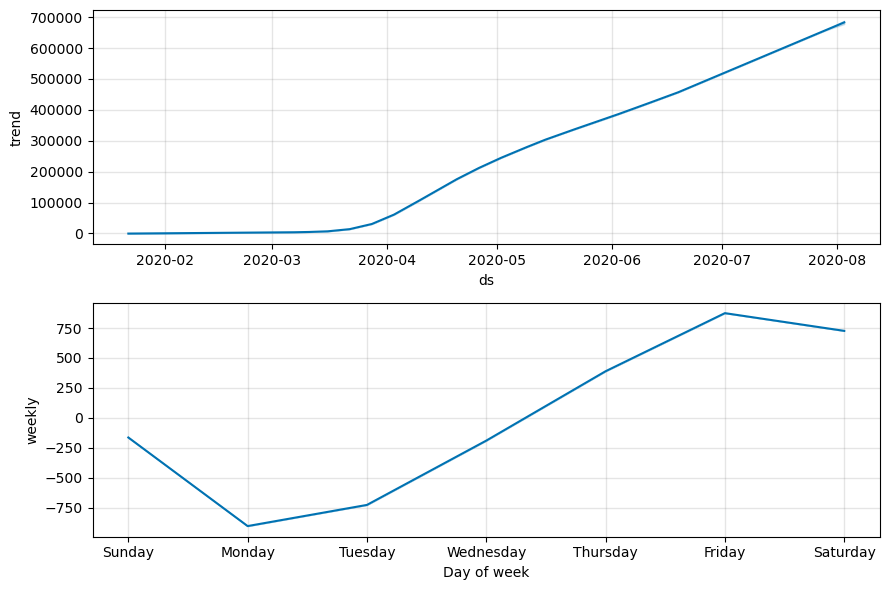

In [74]:
deaths_forecast_plot2_=model2.plot_components(forecast2)

In [75]:
# Lets do forecasting for recovered cases

In [76]:
Recovered.rename(columns={'date':'ds', 'recovered':'y'}, inplace=True)
Recovered

ds        y
0    2020-01-22       28
1    2020-01-23       30
2    2020-01-24       36
3    2020-01-25       39
4    2020-01-26       52
..          ...      ...
183  2020-07-23  8710969
184  2020-07-24  8939705
185  2020-07-25  9158743
186  2020-07-26  9293464
187  2020-07-27  9468087

[188 rows x 2 columns]

In [77]:
model3=Prophet(interval_width=0.95)

In [78]:
model3.fit(Recovered)

12:11:08 - cmdstanpy - INFO - Chain [1] start processing
12:11:08 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
future3=model3.make_future_dataframe(periods=7)

In [80]:
forecast3=model3.predict(future3)

In [81]:
forecast3[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  9.312226e+06  9.196884e+06  9.441608e+06
189 2020-07-29  9.454288e+06  9.334431e+06  9.572459e+06
190 2020-07-30  9.597015e+06  9.474043e+06  9.716120e+06
191 2020-07-31  9.738469e+06  9.611946e+06  9.861374e+06
192 2020-08-01  9.878708e+06  9.745356e+06  9.997300e+06
193 2020-08-02  1.000468e+07  9.890532e+06  1.012361e+07
194 2020-08-03  1.014119e+07  1.001206e+07  1.026898e+07

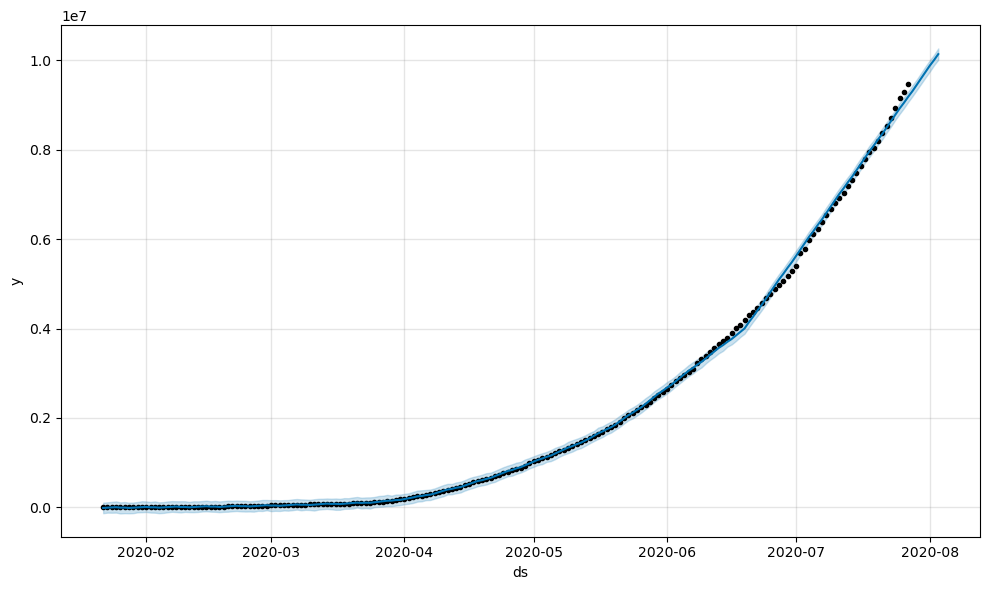

In [82]:
recovered_forecast_plot3=model3.plot(forecast3)

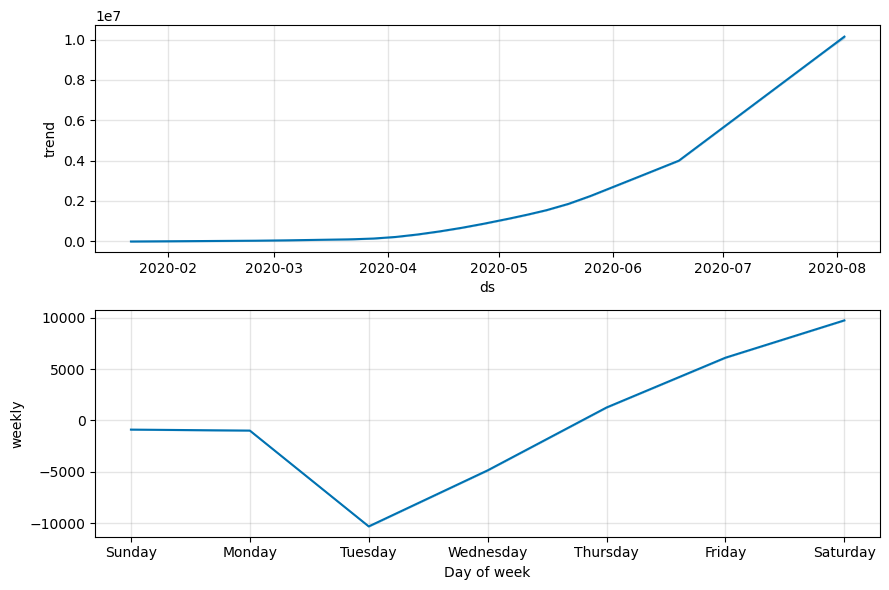

In [83]:
recovered_forecast_plot3_=model3.plot_components(forecast3)

In [84]:
# Lets do forecasting for active cases

In [85]:
Active.rename(columns={'date':'ds', 'active':'y'}, inplace=True)
Active

ds        y
0    2020-01-22      510
1    2020-01-23      606
2    2020-01-24      879
3    2020-01-25     1353
4    2020-01-26     2010
..          ...      ...
183  2020-07-23  6166006
184  2020-07-24  6212290
185  2020-07-25  6243930
186  2020-07-26  6309711
187  2020-07-27  6358362

[188 rows x 2 columns]

In [86]:
model4=Prophet(interval_width=0.95)

In [87]:
model4.fit(Active)

12:11:12 - cmdstanpy - INFO - Chain [1] start processing
12:11:12 - cmdstanpy - INFO - Chain [1] done processing


In [88]:
future4=model4.make_future_dataframe(periods=7)

In [89]:
forecast4=model4.predict(future4)

In [90]:
forecast4[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  6.352342e+06  6.285649e+06  6.423993e+06
189 2020-07-29  6.414671e+06  6.347415e+06  6.481034e+06
190 2020-07-30  6.480099e+06  6.409116e+06  6.550840e+06
191 2020-07-31  6.548110e+06  6.477516e+06  6.623732e+06
192 2020-08-01  6.610247e+06  6.538395e+06  6.678876e+06
193 2020-08-02  6.677474e+06  6.601694e+06  6.757686e+06
194 2020-08-03  6.731170e+06  6.656210e+06  6.808062e+06

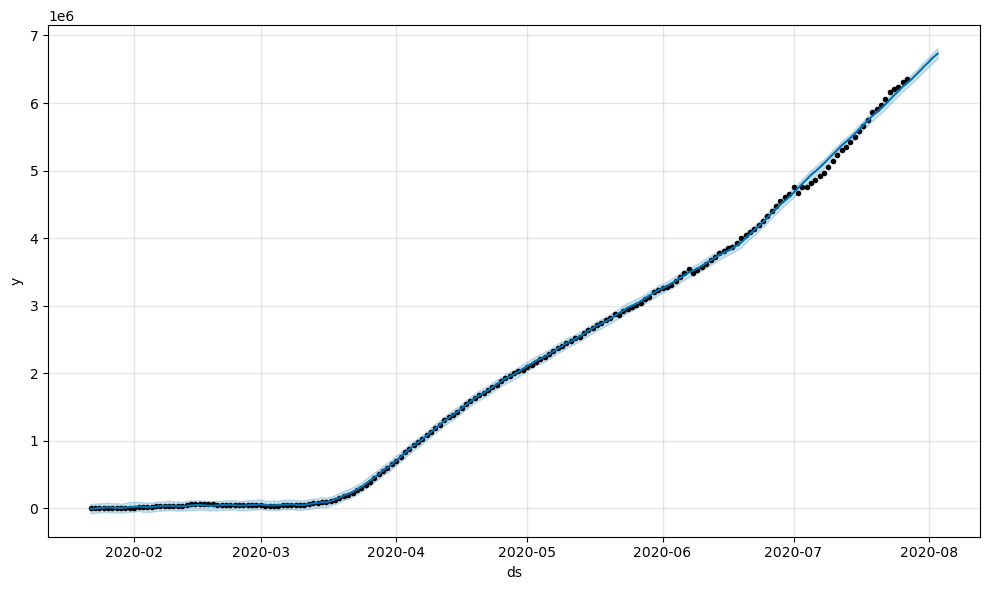

In [91]:
active_forecast_plot4=model4.plot(forecast4)

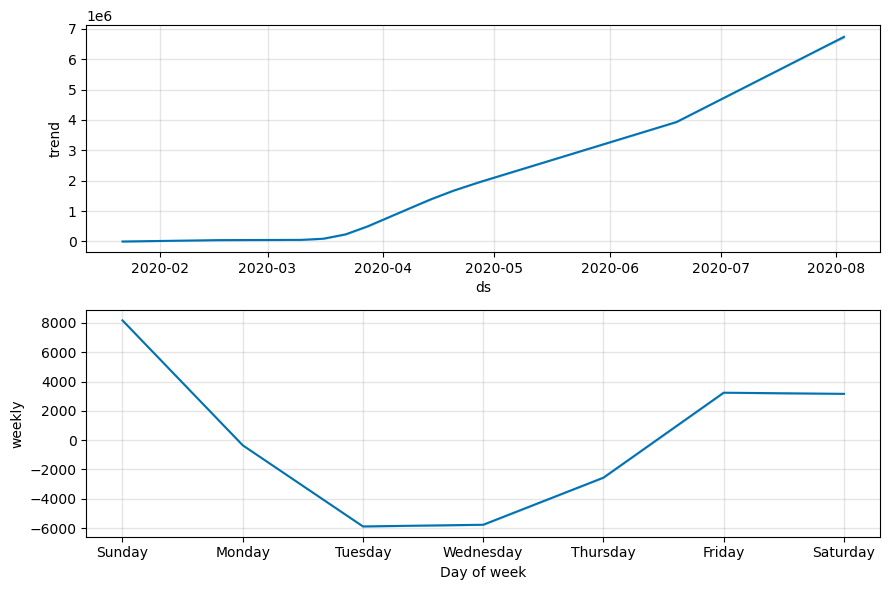

In [92]:
active_forecast_plot4_=model4.plot_components(forecast4)